In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
df = yf.download(['MSFT','KO','TSLA'],start='2015-01-01')['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [3]:
df

,KO,MSFT,TSLA
Date,,,
2015-01-02,32.102886,40.620655,14.620667
2015-01-05,32.102886,40.247131,14.006000
2015-01-06,32.346664,39.656399,14.085333
2015-01-07,32.750423,40.160244,14.063333
2015-01-08,33.146564,41.341686,14.041333
...,...,...,...
2023-06-09,60.012947,326.790009,244.399994
2023-06-12,59.754910,331.850006,249.830002
2023-06-13,59.993099,334.290009,258.709991


In [4]:
ret_df = df.pct_change()

In [5]:
ret_df

,KO,MSFT,TSLA
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,0.000000,-0.009195,-0.042041
2015-01-06,0.007594,-0.014678,0.005664
2015-01-07,0.012482,0.012705,-0.001562
2015-01-08,0.012096,0.029418,-0.001564
...,...,...,...
2023-06-09,0.001656,0.004704,0.040620
2023-06-12,-0.004300,0.015484,0.022218
2023-06-13,0.003986,0.007353,0.035544


In [6]:
ret_df.dropna(inplace=True)

In [7]:
(ret_df + 1).cumprod() - 1

,KO,MSFT,TSLA
Date,,,
2015-01-05,0.000000,-0.009195,-0.042041
2015-01-06,0.007594,-0.023738,-0.036615
2015-01-07,0.020171,-0.011334,-0.038120
2015-01-08,0.032510,0.017750,-0.039624
2015-01-09,0.021120,0.009196,-0.057681
...,...,...,...
2023-06-09,0.869394,7.044922,15.716063
2023-06-12,0.861356,7.169489,16.087455
2023-06-13,0.868776,7.229557,16.694814


<AxesSubplot:xlabel='Date'>

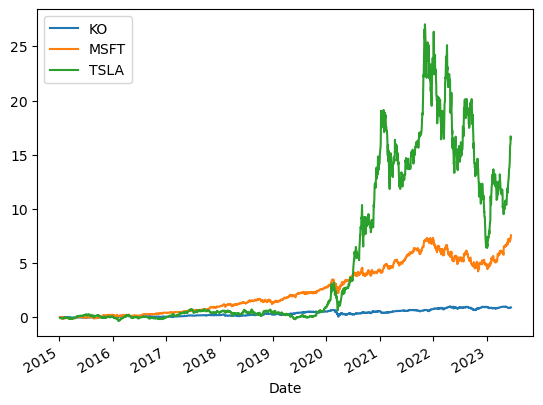

In [8]:
((ret_df + 1).cumprod() - 1).plot()

In [9]:
ret_df.mean()

KO      0.000372
MSFT    0.001168
TSLA    0.001987
dtype: float64

In [10]:
ret_df.std()

KO      0.011649
MSFT    0.017759
TSLA    0.035838
dtype: float64

In [11]:
ret_df.cov()

,KO,MSFT,TSLA
KO,0.000136,0.000090,0.000078
MSFT,0.000090,0.000315,0.000264
TSLA,0.000078,0.000264,0.001284


In [12]:
ret_df.corr()

,KO,MSFT,TSLA
KO,1.000000,0.433855,0.185887
MSFT,0.433855,1.000000,0.414323
TSLA,0.185887,0.414323,1.000000


In [13]:
W = np.ones(len(ret_df.columns))/len(ret_df.columns)

In [14]:
W

array([0.33333333, 0.33333333, 0.33333333])

In [15]:
pf_exp = W.dot(ret_df.mean())

In [16]:
pf_std = (W.dot(ret_df.cov().dot(W)))**(1/2)

In [17]:
pf_exp

0.0011757301766133314

In [18]:
pf_std

0.016988709439505874

In [19]:
ret_df.mean()

KO      0.000372
MSFT    0.001168
TSLA    0.001987
dtype: float64

In [20]:
ret_df.std()

KO      0.011649
MSFT    0.017759
TSLA    0.035838
dtype: float64

In [21]:
pf_exp/pf_std
#sharpe ratio of the portfolio

0.06920656220532359

In [22]:
ret_df.mean()/ret_df.std()
#Sharpe ratios of the components

KO      0.031921
MSFT    0.065767
TSLA    0.055455
dtype: float64

In [23]:
ret_df

,KO,MSFT,TSLA
Date,,,
2015-01-05,0.000000,-0.009195,-0.042041
2015-01-06,0.007594,-0.014678,0.005664
2015-01-07,0.012482,0.012705,-0.001562
2015-01-08,0.012096,0.029418,-0.001564
2015-01-09,-0.011032,-0.008405,-0.018802
...,...,...,...
2023-06-09,0.001656,0.004704,0.040620
2023-06-12,-0.004300,0.015484,0.022218
2023-06-13,0.003986,0.007353,0.035544


In [24]:
ret_df.mean(axis=1)

Date
2015-01-05   -0.017079
2015-01-06   -0.000473
2015-01-07    0.007875
2015-01-08    0.013317
2015-01-09   -0.012746
                ...   
2023-06-09    0.015660
2023-06-12    0.011134
2023-06-13    0.015628
2023-06-14    0.002828
2023-06-15    0.014057
Length: 2127, dtype: float64

In [25]:
(ret_df.mean(axis=1) + 1).cumprod() - 1

Date
2015-01-05   -0.017079
2015-01-06   -0.017544
2015-01-07   -0.009807
2015-01-08    0.003379
2015-01-09   -0.009410
                ...   
2023-06-09    7.569672
2023-06-12    7.665086
2023-06-13    7.800501
2023-06-14    7.825392
2023-06-15    7.949454
Length: 2127, dtype: float64

<AxesSubplot:xlabel='Date'>

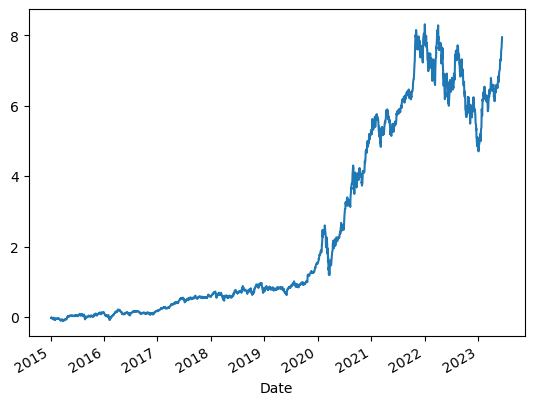

In [26]:
((ret_df.mean(axis=1) + 1).cumprod() - 1).plot()